In [2]:
import pandas as pd

result_df = pd.read_csv("./results_synthetic_sparse.csv").iloc[:,1:]

In [3]:
result_df
result_df = result_df[result_df.method != "aps"]

In [4]:
result_df.groupby(["num_clf_data", "alpha", "method"]).aggregate("mean").reset_index()

,num_clf_data,alpha,method,seed,avg_set_size,coverage_rate,accuracy
0,10,0.02,rand_aps,9.5,2.6675,0.9810,0.5480
1,10,0.02,ranker,9.5,2.1255,0.9830,0.5480
2,10,0.02,thr,9.5,2.5475,0.9860,0.5480
3,10,0.05,rand_aps,9.5,2.4210,0.9555,0.5480
4,10,0.05,ranker,9.5,1.7130,0.9540,0.5480
...,...,...,...,...,...,...,...
79,150,0.10,ranker,9.5,1.1730,0.9025,0.8585
80,150,0.10,thr,9.5,1.1495,0.9145,0.8585
81,150,0.20,rand_aps,9.5,1.0495,0.8120,0.8585
82,150,0.20,ranker,9.5,0.9190,0.8020,0.8585


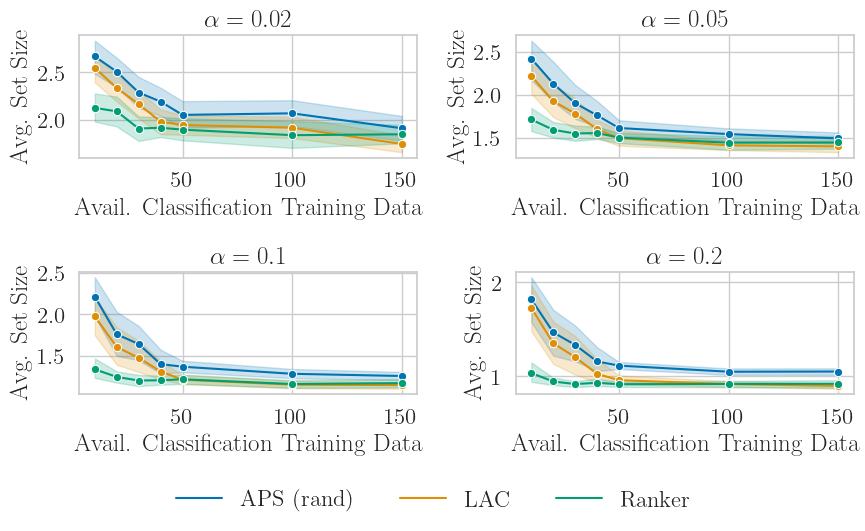

In [9]:
import enum
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5,rc={'text.usetex' : True})
sns.set_style("whitegrid")
plt.rc('font', **{'family': 'serif'})
sns.set_palette("colorblind")
plt.rcParams["figure.figsize"] = (9, 5)
fig,axes = plt.subplots(2,2)
axes = axes.ravel()
alphas = [0.02, 0.05, 0.1, 0.2]
for index, alpha in enumerate(alphas):
    ax = axes[index]
    alpha_df = result_df[result_df.alpha==alpha]
    sns.lineplot(ax=ax, data=alpha_df, hue="method" ,style="alpha", x="num_clf_data", y="avg_set_size", marker="o", legend=False)
    ax.set_xlabel("Avail. Classification Training Data")
    ax.set_ylabel("Avg. Set Size")
    ax.set_title(fr"$\alpha={alpha}$")


# Dummy plot (not shown) just to get handles/labels
dummy_ax = fig.add_subplot(111, frameon=False)  # invisible axis
dummy_ax.axis('off')  # hide it
dummy_plot = sns.lineplot(data=result_df, x='num_clf_data', y='avg_set_size', hue='method', ax=dummy_ax, legend='full')
handles, labels = dummy_ax.get_legend_handles_labels()
dummy_ax.remove()

label_map = {"rand_aps" : "APS (rand)","thr" : "LAC","ranker" : "Ranker",}

new_labels = [label_map.get(label, label) for label in labels]
lgd = fig.legend(handles, new_labels, loc='lower center', ncol=len(new_labels), bbox_to_anchor=(0.5, -0.1), frameon=False)
# for ax in axes:
#     ax.legend_.remove()

fig.tight_layout() 
plt.savefig("synthetic_clf_vs_ranker.pdf",bbox_extra_artists=(lgd,), bbox_inches='tight')
# plt.savefig("synthetic_clf_vs_ranker.pdf")

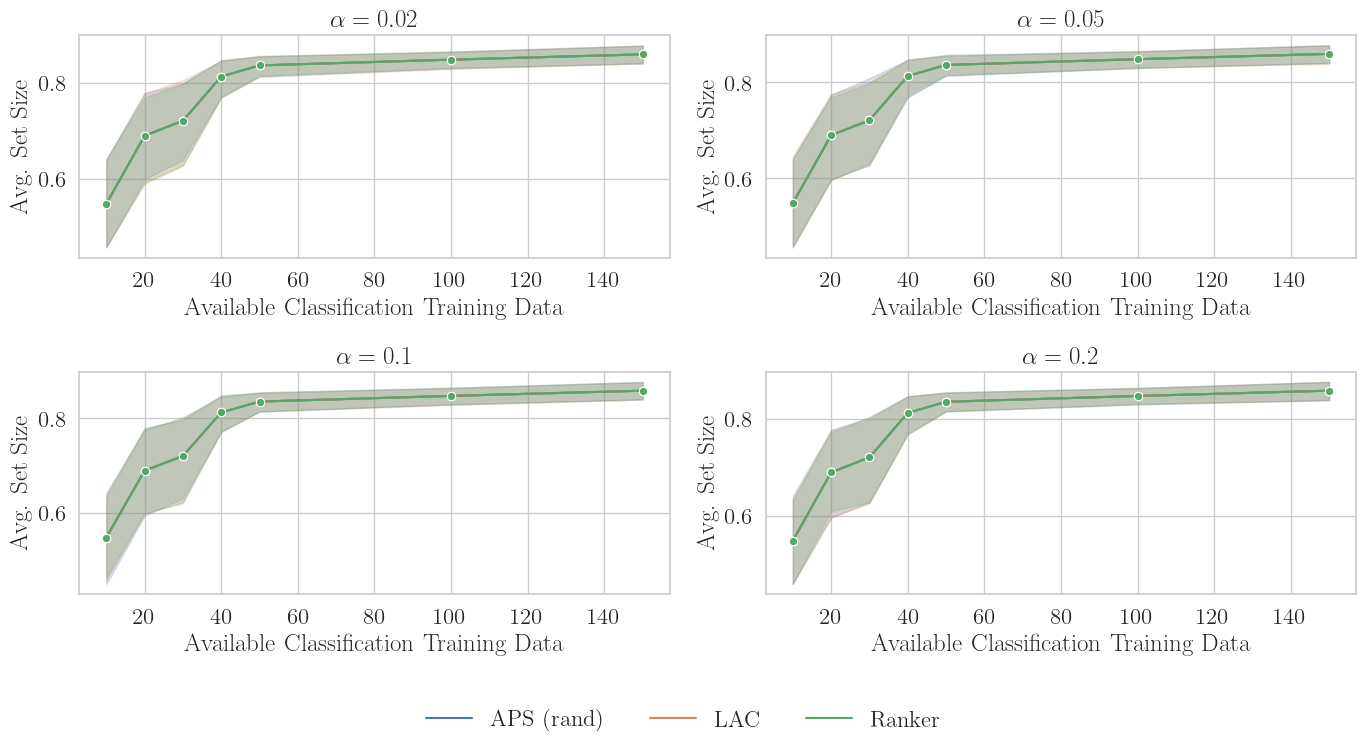

In [6]:
import enum
import seaborn as sns
sns.set(font_scale=1.5,rc={'text.usetex' : True})
sns.set_style("whitegrid")
plt.rc('font', **{'family': 'serif'})
plt.rcParams["figure.figsize"] = (14, 7)
fig,axes = plt.subplots(2,2)
axes = axes.ravel()
for index, alpha in enumerate(alphas):
    ax = axes[index]
    alpha_df = result_df[result_df.alpha==alpha]
    sns.lineplot(ax=ax, data=alpha_df, hue="method" ,style="alpha", x="num_clf_data", y="accuracy", marker="o", legend=False)
    ax.set_xlabel("Available Classification Training Data")
    ax.set_ylabel("Avg. Set Size")
    ax.set_title(fr"$\alpha={alpha}$")


# Dummy plot (not shown) just to get handles/labels
dummy_ax = fig.add_subplot(111, frameon=False)  # invisible axis
dummy_ax.axis('off')  # hide it
dummy_plot = sns.lineplot(data=result_df, x='num_clf_data', y='accuracy', hue='method', ax=dummy_ax, legend='full')
handles, labels = dummy_ax.get_legend_handles_labels()
dummy_ax.remove()

label_map = {"rand_aps" : "APS (rand)","thr" : "LAC","ranker" : "Ranker",}

new_labels = [label_map.get(label, label) for label in labels]
fig.legend(handles, new_labels, loc='lower center', ncol=len(new_labels), bbox_to_anchor=(0.5, -0.1), frameon=False)
# for ax in axes:
#     ax.legend_.remove()

fig.tight_layout() 
# plt.savefig("replicating.pdf",bbox_extra_artists=(lgd,), bbox_inches='tight')


<Axes: xlabel='num_clf_data', ylabel='accuracy'>

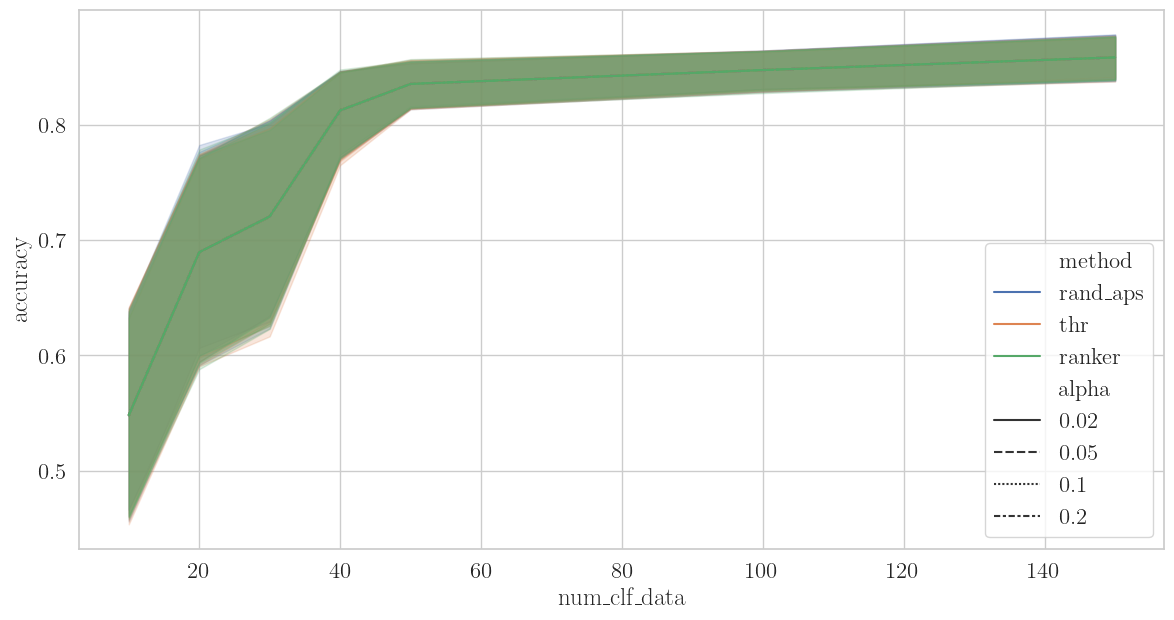

In [7]:
sns.lineplot(data=result_df, hue="method" ,style="alpha", x="num_clf_data", y="accuracy")


In [8]:
result_df

,seed,num_clf_data,alpha,method,avg_set_size,coverage_rate,accuracy
0,0,10,0.02,rand_aps,2.72,0.99,0.36
1,0,10,0.05,rand_aps,2.33,0.97,0.36
2,0,10,0.10,rand_aps,1.97,0.91,0.36
3,0,10,0.20,rand_aps,1.77,0.82,0.36
8,0,10,0.02,thr,2.60,0.99,0.36
...,...,...,...,...,...,...,...
2235,19,150,0.20,thr,0.93,0.84,0.88
2236,19,150,0.02,ranker,2.02,1.00,0.88
2237,19,150,0.05,ranker,1.51,0.99,0.88
2238,19,150,0.10,ranker,1.22,0.97,0.88
